##### <strong>Target:</strong>
- 'ADHD(past+present)'
- Case: 19.27%

##### <strong>Parameters:</strong>
1. Cross Validation nubmer: 5 (outer and inner)
2. n_estimator: np.arange(20, 200, 20)
3. max_depth: np.arange(10, 100, 10)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import KFold, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import r2_score, classification_report, confusion_matrix, accuracy_score, log_loss

#### 1. Raw GPS data

In [3]:
my_data = pd.read_csv('/home/ubuntu/SEOYOON/KSAD/Data/KSAD_GPS_raw_baseline.csv', header=0)
my_data['KEY'] = my_data['KEY'].astype(str)
len(my_data)

4561

In [4]:
target1 = 'ksads_14_853_p'
target2 = 'ksads_14_854_p'
y1 = my_data[target1]
y2 = my_data[target2]

y = []

y1.values
y2.values

for i in range(len(y1)):
    if y1[i]==1 or y2[i]==1:
        y.append(1)
    elif np.isnan(y1[i]) and np.isnan(y2[i]):
        y.append(np.nan)
    else:
        y.append(0)
y = pd.DataFrame(y, columns=['ksads_adhd'])
y_adhd = pd.concat([y1, y2, y], axis=1)
y_adhd

,ksads_14_853_p,ksads_14_854_p,ksads_adhd
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0
5,0.0,0.0,0.0
6,1.0,0.0,1.0
7,0.0,0.0,0.0
8,0.0,0.0,0.0
9,0.0,1.0,1.0


In [5]:
my_data = pd.concat([my_data, y], axis=1)
my_data.head()

,KEY,ADraw,ADHDraw,ASDraw,ASPraw,BIPraw,BMIraw,CANNABISraw,CPraw,DEPRESSIONraw,...,ksads_25_317_p,ksads_25_32_p,ksads_25_33_p,ksads_25_318_p,ksads_25_319_p,ksads_timestamp_p,ksads_duration_p,collection_title,study_cohort_name,ksads_adhd
0,NDARINV003RTV85,-5.780160,0.000318,-0.368089,-0.583751,0.003292,0.004191,-5.988192,-2.156561,0.002583,...,NaN,NaN,NaN,NaN,NaN,10-01-2018 11:53,47.0,Adolescent Brain Cognitive Development Study (...,ABCD 2.0 Data Release,0.0
1,NDARINV007W6H7B,9.133668,-0.008823,0.000000,-0.544655,0.003292,0.004191,-3.063278,-3.683131,0.002060,...,NaN,NaN,NaN,NaN,NaN,02-21-2017 01:03,49.0,Adolescent Brain Cognitive Development Study (...,ABCD 2.0 Data Release,0.0
2,NDARINV00BD7VDC,2.059180,-0.005448,0.000000,-0.601716,0.003292,0.000000,-10.187523,-4.160142,0.006631,...,NaN,NaN,NaN,NaN,NaN,06-12-2018 10:14,23.0,Adolescent Brain Cognitive Development Study (...,ABCD 2.0 Data Release,0.0
3,NDARINV00J52GPG,8.591499,0.000838,0.000000,-0.068964,0.003292,0.000000,-0.944047,-4.682147,0.004259,...,NaN,NaN,NaN,NaN,NaN,09-05-2018 03:45,56.0,Adolescent Brain Cognitive Development Study (...,ABCD 2.0 Data Release,0.0
4,NDARINV00NPMHND,3.104598,-0.012818,0.000000,-1.211318,0.000000,0.000000,-10.269615,-4.843486,0.000878,...,NaN,NaN,NaN,NaN,NaN,03-21-2017 04:29,35.0,Adolescent Brain Cognitive Development Study (...,ABCD 2.0 Data Release,0.0


In [6]:
target = 'ksads_adhd'
my_data = my_data.dropna(subset=[target])
len(my_data)

4521

In [7]:
print("case number: {}".format(sum(my_data[target])))
print("case ratio: {:.2f}%".format(sum(my_data[target])/len(my_data)*100))

case number: 871.0
case ratio: 19.27%


#### CONSTANTS:

In [8]:
k_fold = 5

num_samples = len(my_data)
each_fold_size = int(num_samples/k_fold) +1

print('num_samples: ', num_samples)
print('fold_size: ', each_fold_size)

num_samples:  4521
fold_size:  905


#### PARAMETERS:

In [10]:
X = my_data.iloc[:, 1:27]
features = X.columns

In [15]:
y = my_data[target].astype(int)

In [17]:
# X = X.to_numpy()
y = y.ravel()

In [18]:
def plot_feature_importances(model):
    n_features = len(features)
    plt.figure(figsize=(6,6))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), features)
    plt.xlabel("Feature Importances")
    plt.ylabel("Features")
    plt.ylim(-1, n_features)
    plt.show()

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, roc_curve, auc, f1_score



--------------------------------------------------
Loop:  1


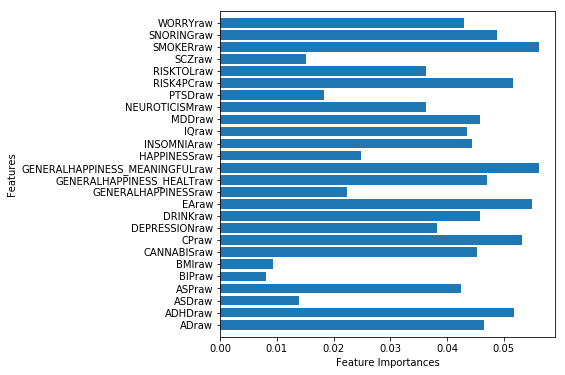

1. Feature Importances.......................
	 [0.0465704  0.05183134 0.01387421 0.04251607 0.00815313 0.00937493
 0.04535783 0.05330363 0.0382056  0.0458628  0.05491487 0.02237317
 0.04709343 0.0561473  0.02482424 0.04444053 0.04345431 0.0458162
 0.03631935 0.0183499  0.05156829 0.03634823 0.01521558 0.05621787
 0.04886077 0.04300602]
2. best train parameter......................
	 {'max_depth': 10, 'n_estimators': 60}
3. best train score..........................
	 0.5213052266675134


4. ROC-AUC...................................
	 0.5
5. f1 score..................................
	 0.0
6. Confusion matrix..........................
[[730   0]
 [175   0]]
7. Classify report...........................
             precision    recall  f1-score   support

          0       0.81      1.00      0.89       730
          1       0.00      0.00      0.00       175

avg / total       0.65      0.81      0.72       905

8. Accuracy score............................
	 0.8066298342541437


---

/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


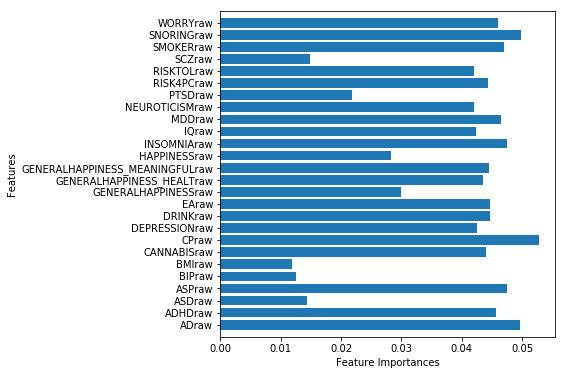

1. Feature Importances.......................
	 [0.0496383  0.04556953 0.01431988 0.04740215 0.01257692 0.01182062
 0.0440214  0.05275104 0.04256223 0.04459893 0.04464812 0.02992978
 0.04354155 0.04448549 0.02820999 0.04740098 0.04227032 0.04648277
 0.04197918 0.02180842 0.04433077 0.04193499 0.0149052  0.04704271
 0.04970957 0.04605917]
2. best train parameter......................
	 {'max_depth': 60, 'n_estimators': 40}
3. best train score..........................
	 0.5253420827427401


4. ROC-AUC...................................
	 0.49931506849315066
5. f1 score..................................
	 0.0
6. Confusion matrix..........................
[[729   1]
 [174   0]]
7. Classify report...........................
             precision    recall  f1-score   support

          0       0.81      1.00      0.89       730
          1       0.00      0.00      0.00       174

avg / total       0.65      0.81      0.72       904

8. Accuracy score............................
	 0.80641

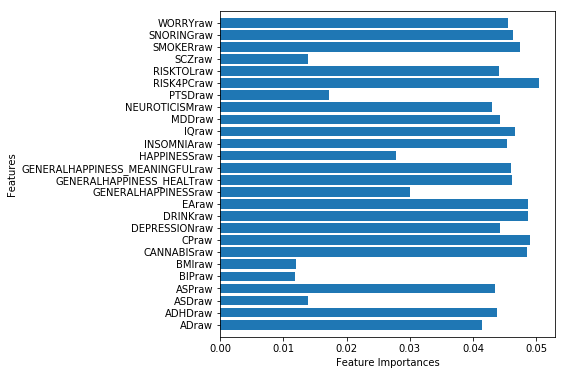

1. Feature Importances.......................
	 [0.04139196 0.04381122 0.01387473 0.04345687 0.01186676 0.01203257
 0.04855854 0.04901407 0.04429169 0.04865213 0.04871784 0.0300299
 0.04619331 0.04599956 0.02781167 0.04534491 0.04672352 0.04428423
 0.04298085 0.01721316 0.05043757 0.04410414 0.01383335 0.04745639
 0.04631267 0.04560638]
2. best train parameter......................
	 {'max_depth': 50, 'n_estimators': 60}
3. best train score..........................
	 0.5148690167391354


4. ROC-AUC...................................
	 0.5
5. f1 score..................................
	 0.0
6. Confusion matrix..........................
[[730   0]
 [174   0]]
7. Classify report...........................
             precision    recall  f1-score   support

          0       0.81      1.00      0.89       730
          1       0.00      0.00      0.00       174

avg / total       0.65      0.81      0.72       904

8. Accuracy score............................
	 0.8075221238938053


---

/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


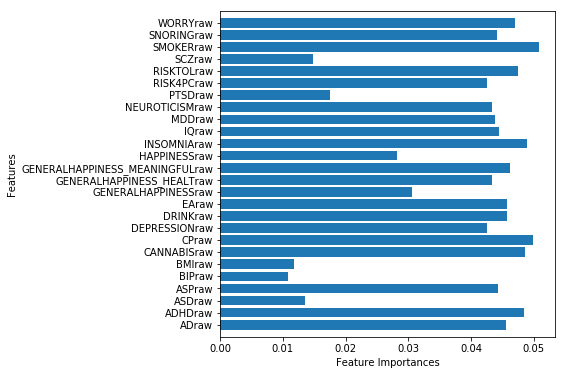

1. Feature Importances.......................
	 [0.04563903 0.0484208  0.01348913 0.04423997 0.01077761 0.01185059
 0.04867827 0.04992056 0.04249722 0.04571827 0.04568238 0.03057092
 0.04336118 0.04625012 0.02814025 0.04892689 0.0443936  0.04382999
 0.04328863 0.01756144 0.0425052  0.04749361 0.01476648 0.05083705
 0.04412529 0.0470355 ]
2. best train parameter......................
	 {'max_depth': 40, 'n_estimators': 20}
3. best train score..........................
	 0.5224016336701859


4. ROC-AUC...................................
	 0.5038261691072271
5. f1 score..................................
	 0.03260869565217392
6. Confusion matrix..........................
[[723   7]
 [171   3]]
7. Classify report...........................
             precision    recall  f1-score   support

          0       0.81      0.99      0.89       730
          1       0.30      0.02      0.03       174

avg / total       0.71      0.80      0.73       904

8. Accuracy score.......................

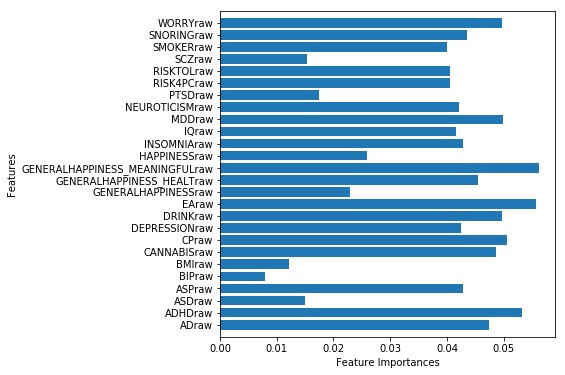

1. Feature Importances.......................
	 [0.0474875  0.05321521 0.0150254  0.04282851 0.00786994 0.01212949
 0.04873985 0.0505613  0.04250195 0.04968582 0.05569433 0.02292344
 0.04542446 0.05622943 0.02594869 0.04285315 0.04164481 0.04993637
 0.04218334 0.01736606 0.04062972 0.04048767 0.01538606 0.03996774
 0.04349272 0.04978703]
2. best train parameter......................
	 {'max_depth': 10, 'n_estimators': 120}
3. best train score..........................
	 0.5203024357459388


4. ROC-AUC...................................
	 0.5
5. f1 score..................................
	 0.0
6. Confusion matrix..........................
[[730   0]
 [174   0]]
7. Classify report...........................
             precision    recall  f1-score   support

          0       0.81      1.00      0.89       730
          1       0.00      0.00      0.00       174

avg / total       0.65      0.81      0.72       904

8. Accuracy score............................
	 0.8075221238938053


/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [21]:
import os
inner_cv = StratifiedKFold(n_splits = k_fold, shuffle=False, random_state = 123)
outer_cv = StratifiedKFold(n_splits = k_fold, shuffle=False, random_state = 123)
loop=1
for train_index, test_index in outer_cv.split(X, y):
    print('\n')
    print('-'*50)
    print('Loop: ', loop)
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    #No Tuning
#     rf = RandomForestClassifier(n_estimators= 100, min_samples_leaf=5)
#     rf.fit(X_train, y_train)
#     y_pred = rf.predict(X_test)
    
    #Tuning
    rf = RandomForestClassifier()
    params = {'n_estimators': np.arange(20, 200, 20),
              'max_depth': np.arange(10, 100, 10)}
    rf_grid = GridSearchCV(estimator = rf, param_grid = params, cv = inner_cv, scoring='roc_auc', n_jobs=-1, return_train_score=True)
    rf_grid.fit(X_train, y_train)
    y_pred=rf_grid.predict(X_test)
    
    result = pd.DataFrame(rf_grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]
    if not os.path.exists("./TuningResult/"):
        os.mkdir("./TuningResult/")
    filename = "TuningResult/KSAD_11_HT"+str(loop)+".csv"
    result.to_csv(filename, index=False)
    
    best_est = rf_grid.best_estimator_
    plot_feature_importances(best_est)
    
    print("{:.<45}".format("1. Feature Importances"))
    print("\t",best_est.feature_importances_)
    
    print("{:.<45}".format("2. best train parameter"))
    print("\t",rf_grid.best_params_)
    print("{:.<45}".format("3. best train score"))
    print("\t",rf_grid.best_score_)
    
    print("\n")
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print("{:.<45}".format("4. ROC-AUC"))
    print("\t",roc_auc)
    
    f1 = f1_score(y_test, y_pred, average='binary')
    print("{:.<45}".format("5. f1 score"))
    print("\t",f1)
    print("{:.<45}".format("6. Confusion matrix"))
    print(confusion_matrix(y_test, y_pred))
    print("{:.<45}".format("7. Classify report"))
    print(classification_report(y_test, y_pred))
    print("{:.<45}".format("8. Accuracy score"))
    print("\t",accuracy_score(y_test, y_pred))
    
    loop += 1

### With normalized GPS

In [25]:
X = my_data.iloc[:, 27:53]
features = X.columns
features
X = X.to_numpy()



--------------------------------------------------
Loop:  1


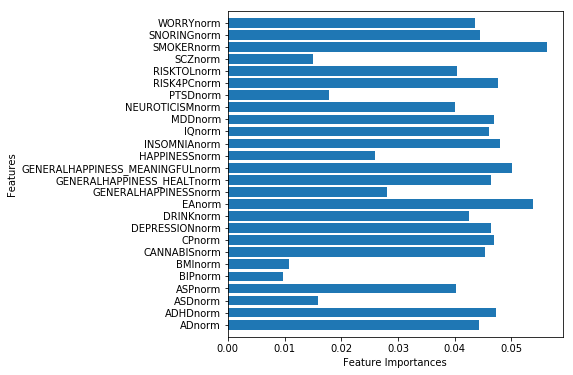

1. Feature Importances.......................
	 [0.04428216 0.04729072 0.01595896 0.04026402 0.00978783 0.01081109
 0.04527875 0.04700463 0.04647652 0.0424952  0.05371853 0.02797979
 0.04635826 0.0500477  0.0260097  0.04792297 0.04609628 0.04697772
 0.04012669 0.01781727 0.0476046  0.04042413 0.01507957 0.05621883
 0.04438551 0.04358257]
2. best train parameter......................
	 {'max_depth': 10, 'n_estimators': 120}
3. best train score..........................
	 0.5376379964404729


4. ROC-AUC...................................
	 0.5
5. f1 score..................................
	 0.0
6. Confusion matrix..........................
[[730   0]
 [175   0]]
7. Classify report...........................
             precision    recall  f1-score   support

          0       0.81      1.00      0.89       730
          1       0.00      0.00      0.00       175

avg / total       0.65      0.81      0.72       905

8. Accuracy score............................
	 0.8066298342541437


-

/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


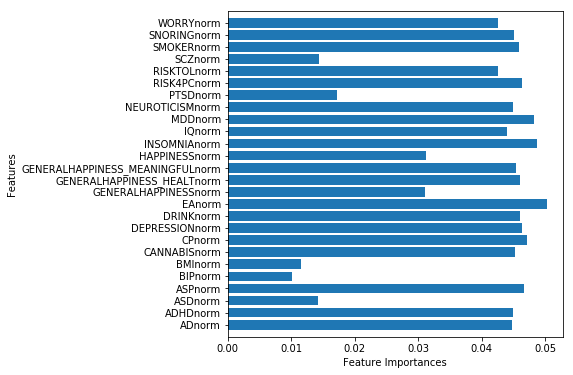

1. Feature Importances.......................
	 [0.04470429 0.04484972 0.01413324 0.04664074 0.01009707 0.01150994
 0.04520519 0.04708759 0.04627605 0.04599416 0.05021657 0.03099974
 0.04608667 0.04537313 0.03126052 0.04862827 0.04399951 0.04829506
 0.04488987 0.01720914 0.04628127 0.04252467 0.01433866 0.04581806
 0.04507754 0.04250335]
2. best train parameter......................
	 {'max_depth': 40, 'n_estimators': 40}
3. best train score..........................
	 0.5212944843604418


4. ROC-AUC...................................
	 0.49944890568414424
5. f1 score..................................
	 0.011111111111111112
6. Confusion matrix..........................
[[725   5]
 [173   1]]
7. Classify report...........................
             precision    recall  f1-score   support

          0       0.81      0.99      0.89       730
          1       0.17      0.01      0.01       174

avg / total       0.68      0.80      0.72       904

8. Accuracy score.....................

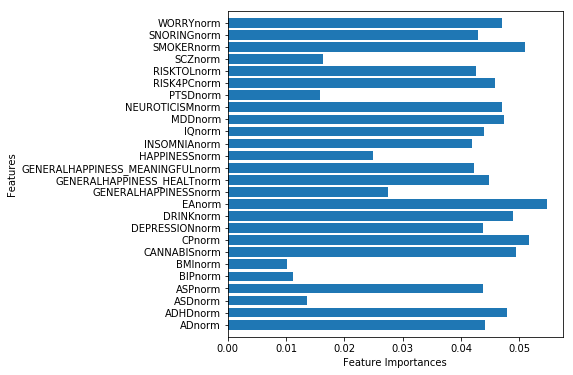

1. Feature Importances.......................
	 [0.04406906 0.0479499  0.01353784 0.04383236 0.01123042 0.01009173
 0.04937799 0.05159651 0.04370032 0.04890708 0.05466802 0.02742671
 0.04481318 0.04218355 0.0249366  0.04194564 0.04385943 0.04735422
 0.04699139 0.01575388 0.04587365 0.04259218 0.016366   0.05096044
 0.04293434 0.04704755]
2. best train parameter......................
	 {'max_depth': 10, 'n_estimators': 120}
3. best train score..........................
	 0.5220063220272952


4. ROC-AUC...................................
	 0.5
5. f1 score..................................
	 0.0
6. Confusion matrix..........................
[[730   0]
 [174   0]]
7. Classify report...........................
             precision    recall  f1-score   support

          0       0.81      1.00      0.89       730
          1       0.00      0.00      0.00       174

avg / total       0.65      0.81      0.72       904

8. Accuracy score............................
	 0.8075221238938053


-

/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


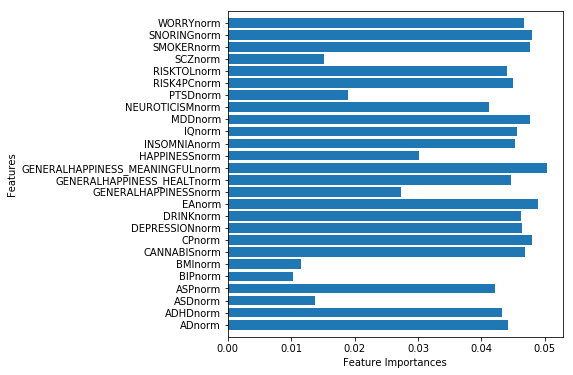

1. Feature Importances.......................
	 [0.04415282 0.04331021 0.01383685 0.04223458 0.01029541 0.01156722
 0.04685578 0.04797771 0.0463775  0.0462391  0.04889752 0.02729942
 0.04473142 0.05032758 0.03011511 0.04536422 0.04571152 0.04771327
 0.04129976 0.01891024 0.04499156 0.04408217 0.01521426 0.04770879
 0.04805963 0.04672635]
2. best train parameter......................
	 {'max_depth': 80, 'n_estimators': 40}
3. best train score..........................
	 0.5161731735206201


4. ROC-AUC...................................
	 0.5008187686978428
5. f1 score..................................
	 0.011235955056179775
6. Confusion matrix..........................
[[727   3]
 [173   1]]
7. Classify report...........................
             precision    recall  f1-score   support

          0       0.81      1.00      0.89       730
          1       0.25      0.01      0.01       174

avg / total       0.70      0.81      0.72       904

8. Accuracy score......................

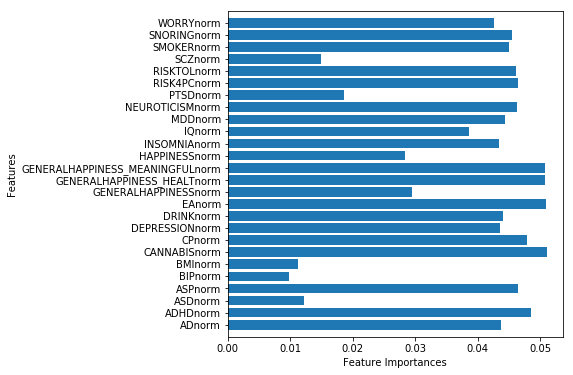

1. Feature Importances.......................
	 [0.04370987 0.04851333 0.01220048 0.04644337 0.00972588 0.01117318
 0.05101472 0.04779515 0.04352281 0.04397875 0.0509429  0.02953762
 0.05068775 0.05073366 0.02841945 0.04331577 0.03866616 0.04427411
 0.04627367 0.01855577 0.04639341 0.04613596 0.01497892 0.04493513
 0.0455258  0.04254639]
2. best train parameter......................
	 {'max_depth': 50, 'n_estimators': 20}
3. best train score..........................
	 0.529199782364688


4. ROC-AUC...................................
	 0.5001338371909936
5. f1 score..................................
	 0.0111731843575419
6. Confusion matrix..........................
[[726   4]
 [173   1]]
7. Classify report...........................
             precision    recall  f1-score   support

          0       0.81      0.99      0.89       730
          1       0.20      0.01      0.01       174

avg / total       0.69      0.80      0.72       904

8. Accuracy score.........................

In [26]:
import os
inner_cv = StratifiedKFold(n_splits = k_fold, shuffle=False, random_state = 123)
outer_cv = StratifiedKFold(n_splits = k_fold, shuffle=False, random_state = 123)
loop=1
for train_index, test_index in outer_cv.split(X, y):
    print('\n')
    print('-'*50)
    print('Loop: ', loop)
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    #No Tuning
#     rf = RandomForestClassifier(n_estimators= 100, min_samples_leaf=5)
#     rf.fit(X_train, y_train)
#     y_pred = rf.predict(X_test)
    
    #Tuning
    rf = RandomForestClassifier()
    params = {'n_estimators': np.arange(20, 200, 20),
              'max_depth': np.arange(10, 100, 10)}
    rf_grid = GridSearchCV(estimator = rf, param_grid = params, cv = inner_cv, scoring='roc_auc', n_jobs=-1, return_train_score=True)
    rf_grid.fit(X_train, y_train)
    y_pred=rf_grid.predict(X_test)
    
    result = pd.DataFrame(rf_grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]
    if not os.path.exists("./TuningResult/"):
        os.mkdir("./TuningResult/")
    filename = "TuningResult/KSAD_11_HT"+str(loop)+"_norm.csv"
    result.to_csv(filename, index=False)
    
    best_est = rf_grid.best_estimator_
    plot_feature_importances(best_est)
    
    print("{:.<45}".format("1. Feature Importances"))
    print("\t",best_est.feature_importances_)
    
    print("{:.<45}".format("2. best train parameter"))
    print("\t",rf_grid.best_params_)
    print("{:.<45}".format("3. best train score"))
    print("\t",rf_grid.best_score_)
    
    print("\n")
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print("{:.<45}".format("4. ROC-AUC"))
    print("\t",roc_auc)
    
    f1 = f1_score(y_test, y_pred, average='binary')
    print("{:.<45}".format("5. f1 score"))
    print("\t",f1)
    print("{:.<45}".format("6. Confusion matrix"))
    print(confusion_matrix(y_test, y_pred))
    print("{:.<45}".format("7. Classify report"))
    print(classification_report(y_test, y_pred))
    print("{:.<45}".format("8. Accuracy score"))
    print("\t",accuracy_score(y_test, y_pred))
    
    loop += 1

### More Trees
(n_estimators: 200~1000, 50간격)



--------------------------------------------------
Loop:  1


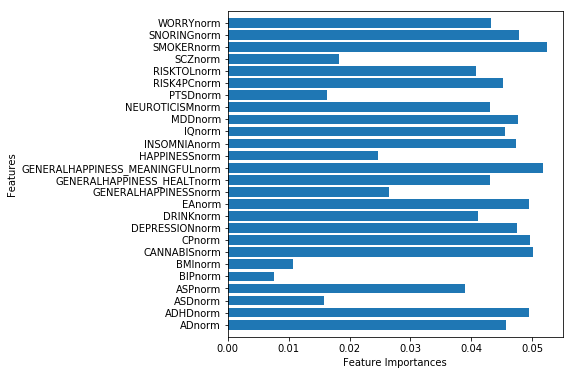

1. Feature Importances.......................
	 [0.04570683 0.04954969 0.01587319 0.03897227 0.00754373 0.01067506
 0.05015163 0.04960639 0.04747487 0.04105114 0.04944762 0.02651876
 0.04308231 0.05177641 0.02468935 0.04744417 0.04560276 0.0476219
 0.04304403 0.01627123 0.0452872  0.04082259 0.01832776 0.05240498
 0.04784782 0.04320634]
2. best train parameter......................
	 {'max_depth': 10, 'n_estimators': 200}
3. best train score..........................
	 0.5331176715516733


4. ROC-AUC...................................
	 0.5
5. f1 score..................................
	 0.0
6. Confusion matrix..........................
[[730   0]
 [175   0]]
7. Classify report...........................
             precision    recall  f1-score   support

          0       0.81      1.00      0.89       730
          1       0.00      0.00      0.00       175

avg / total       0.65      0.81      0.72       905

8. Accuracy score............................
	 0.8066298342541437


--

/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


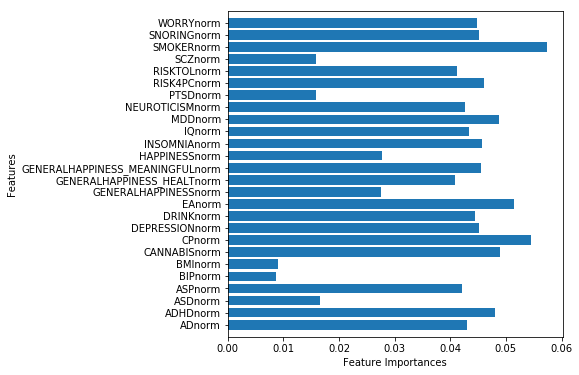

1. Feature Importances.......................
	 [0.04308005 0.0481111  0.01661836 0.04206442 0.00867842 0.0089431
 0.04886486 0.05454144 0.04513549 0.04447277 0.0514543  0.0274773
 0.04082697 0.04551774 0.02763907 0.0456885  0.04339787 0.0487483
 0.04256566 0.01581371 0.04612547 0.04113637 0.01580179 0.05732786
 0.04510723 0.04486183]
2. best train parameter......................
	 {'max_depth': 10, 'n_estimators': 950}
3. best train score..........................
	 0.5223757423522624


4. ROC-AUC...................................
	 0.5
5. f1 score..................................
	 0.0
6. Confusion matrix..........................
[[730   0]
 [174   0]]
7. Classify report...........................
             precision    recall  f1-score   support

          0       0.81      1.00      0.89       730
          1       0.00      0.00      0.00       174

avg / total       0.65      0.81      0.72       904

8. Accuracy score............................
	 0.8075221238938053


----

/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


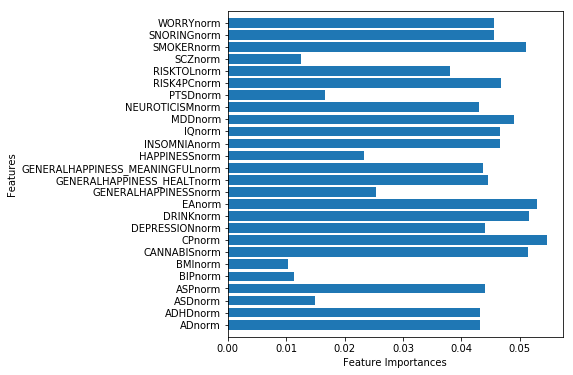

1. Feature Importances.......................
	 [0.04314727 0.04317436 0.01487224 0.04410229 0.0113319  0.01030968
 0.05136966 0.05459733 0.04402029 0.05152409 0.05299043 0.02539756
 0.04450366 0.04362247 0.02338023 0.0465213  0.04667648 0.04900798
 0.04307312 0.01663389 0.04676306 0.03812816 0.0126076  0.0510092
 0.04560169 0.04563406]
2. best train parameter......................
	 {'max_depth': 10, 'n_estimators': 300}
3. best train score..........................
	 0.5151261137801822


4. ROC-AUC...................................
	 0.5
5. f1 score..................................
	 0.0
6. Confusion matrix..........................
[[730   0]
 [174   0]]
7. Classify report...........................
             precision    recall  f1-score   support

          0       0.81      1.00      0.89       730
          1       0.00      0.00      0.00       174

avg / total       0.65      0.81      0.72       904

8. Accuracy score............................
	 0.8075221238938053


--

/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


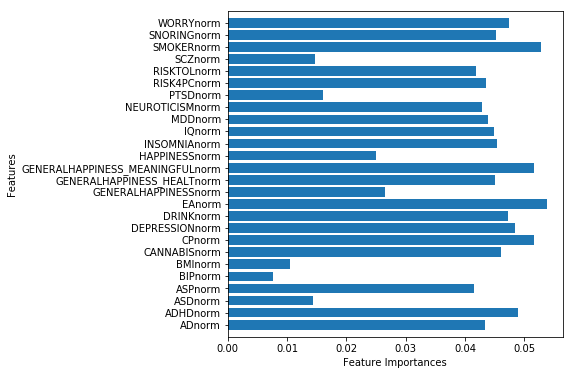

1. Feature Importances.......................
	 [0.04343423 0.04888358 0.01441995 0.04154511 0.00755954 0.01041985
 0.04601811 0.0516033  0.04842547 0.04715315 0.05375485 0.0264831
 0.04501211 0.05158496 0.02504274 0.04542209 0.04492633 0.0438185
 0.04286944 0.01610748 0.04355833 0.041781   0.01464644 0.05283556
 0.04525732 0.04743745]
2. best train parameter......................
	 {'max_depth': 10, 'n_estimators': 950}
3. best train score..........................
	 0.5098624038786712


4. ROC-AUC...................................
	 0.5
5. f1 score..................................
	 0.0
6. Confusion matrix..........................
[[730   0]
 [174   0]]
7. Classify report...........................
             precision    recall  f1-score   support

          0       0.81      1.00      0.89       730
          1       0.00      0.00      0.00       174

avg / total       0.65      0.81      0.72       904

8. Accuracy score............................
	 0.8075221238938053


---

/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


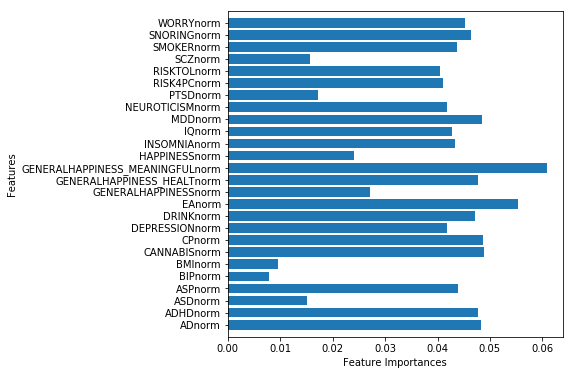

1. Feature Importances.......................
	 [0.04833235 0.04769605 0.01517518 0.04391923 0.00779995 0.00955539
 0.04891527 0.04863247 0.04188514 0.04708224 0.05528632 0.02711353
 0.0476546  0.0608268  0.02402671 0.04338799 0.04283147 0.04849055
 0.04172291 0.01717104 0.04104882 0.04052641 0.01570779 0.04368566
 0.04632833 0.04519781]
2. best train parameter......................
	 {'max_depth': 10, 'n_estimators': 400}
3. best train score..........................
	 0.5244620254890263


4. ROC-AUC...................................
	 0.5
5. f1 score..................................
	 0.0
6. Confusion matrix..........................
[[730   0]
 [174   0]]
7. Classify report...........................
             precision    recall  f1-score   support

          0       0.81      1.00      0.89       730
          1       0.00      0.00      0.00       174

avg / total       0.65      0.81      0.72       904

8. Accuracy score............................
	 0.8075221238938053


/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [27]:
inner_cv = StratifiedKFold(n_splits = k_fold, shuffle=False, random_state = 123)
outer_cv = StratifiedKFold(n_splits = k_fold, shuffle=False, random_state = 123)
loop=1
for train_index, test_index in outer_cv.split(X, y):
    print('\n')
    print('-'*50)
    print('Loop: ', loop)
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    #No Tuning
#     rf = RandomForestClassifier(n_estimators= 100, min_samples_leaf=5)
#     rf.fit(X_train, y_train)
#     y_pred = rf.predict(X_test)
    
    #Tuning
    rf = RandomForestClassifier()
    params = {'n_estimators': np.arange(200, 1000, 50),
              'max_depth': np.arange(10, 100, 10)}
    rf_grid = GridSearchCV(estimator = rf, param_grid = params, cv = inner_cv, scoring='roc_auc', n_jobs=-1, return_train_score=True)
    rf_grid.fit(X_train, y_train)
    y_pred=rf_grid.predict(X_test)
    
    result = pd.DataFrame(rf_grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]
    if not os.path.exists("./TuningResult/"):
        os.mkdir("./TuningResult/")
    filename = "TuningResult/KSAD_11_HT"+str(loop)+"_norm_big.csv"
    result.to_csv(filename, index=False)
    
    best_est = rf_grid.best_estimator_
    plot_feature_importances(best_est)
    
    print("{:.<45}".format("1. Feature Importances"))
    print("\t",best_est.feature_importances_)
    
    print("{:.<45}".format("2. best train parameter"))
    print("\t",rf_grid.best_params_)
    print("{:.<45}".format("3. best train score"))
    print("\t",rf_grid.best_score_)
    
    print("\n")
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print("{:.<45}".format("4. ROC-AUC"))
    print("\t",roc_auc)
    
    f1 = f1_score(y_test, y_pred, average='binary')
    print("{:.<45}".format("5. f1 score"))
    print("\t",f1)
    print("{:.<45}".format("6. Confusion matrix"))
    print(confusion_matrix(y_test, y_pred))
    print("{:.<45}".format("7. Classify report"))
    print(classification_report(y_test, y_pred))
    print("{:.<45}".format("8. Accuracy score"))
    print("\t",accuracy_score(y_test, y_pred))
    
    loop += 1

In [ ]:
inner_cv = KFold(n_splits = k_fold, shuffle=False, random_state = 123)
outer_cv = KFold(n_splits = k_fold, shuffle=False, random_state = 123)
loop=1
for train_index, test_index in outer_cv.split(X, y):
    print('\n')
    print('-'*50)
    print('Loop: ', loop)
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    #No Tuning
#     rf = RandomForestClassifier(n_estimators= 100, min_samples_leaf=5)
#     rf.fit(X_train, y_train)
#     y_pred = rf.predict(X_test)
    
    #Tuning
    rf = RandomForestClassifier()
    params = {'n_estimators': np.arange(200, 500, 20),
              'max_depth': np.arange(10, 100, 10)}
    rf_grid = GridSearchCV(estimator = rf, param_grid = params, cv = inner_cv, scoring='roc_auc', n_jobs=-1, return_train_score=True)
    rf_grid.fit(X_train, y_train)
    y_pred=rf_grid.predict(X_test)
    
    result = pd.DataFrame(rf_grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]
    if not os.path.exists("./TuningResult/"):
        os.mkdir("./TuningResult/")
    filename = "TuningResult/KSAD_4_HT"+str(loop)+".csv"
    result.to_csv(filename, index=False)
    
    best_est = rf_grid.best_estimator_
    plot_feature_importances(best_est)
    
    print("{:.<45}".format("1. Feature Importances"))
    print("\t",best_est.feature_importances_)
    
    print("{:.<45}".format("2. best train parameter"))
    print("\t",rf_grid.best_params_)
    print("{:.<45}".format("3. best train score"))
    print("\t",rf_grid.best_score_)
    
    print("\n")
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print("{:.<45}".format("4. ROC-AUC"))
    print("\t",roc_auc)
    
    f1 = f1_score(y_test, y_pred, average='binary')
    print("{:.<45}".format("5. f1 score"))
    print("\t",f1)
    print("{:.<45}".format("6. Confusion matrix"))
    print(confusion_matrix(y_test, y_pred))
    print("{:.<45}".format("7. Classify report"))
    print(classification_report(y_test, y_pred))
    print("{:.<45}".format("8. Accuracy score"))
    print("\t",accuracy_score(y_test, y_pred))
    
    loop += 1

In [ ]:
inner_cv = KFold(n_splits = k_fold, shuffle=False, random_state = 123)
outer_cv = KFold(n_splits = k_fold, shuffle=False, random_state = 123)
loop=1
for train_index, test_index in outer_cv.split(X, y):
    print('\n')
    print('-'*50)
    print('Loop: ', loop)
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    #No Tuning
#     rf = RandomForestClassifier(n_estimators= 100, min_samples_leaf=5)
#     rf.fit(X_train, y_train)
#     y_pred = rf.predict(X_test)
    
    #Tuning
    rf = RandomForestClassifier()
    params = {'n_estimators': [1000],
              'max_depth': np.arange(10, 100, 10)}
    rf_grid = GridSearchCV(estimator = rf, param_grid = params, cv = inner_cv, scoring='roc_auc', n_jobs=-1, return_train_score=True)
    rf_grid.fit(X_train, y_train)
    y_pred=rf_grid.predict(X_test)
    
    result = pd.DataFrame(rf_grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]
#     if not os.path.exists("./TuningResult/"):
#         os.mkdir("./TuningResult/")
#     filename = "TuningResult/KSAD_4_HT"+str(loop)+".csv"
#     result.to_csv(filename, index=False)
    
    best_est = rf_grid.best_estimator_
    plot_feature_importances(best_est)
    
    print("{:.<45}".format("1. Feature Importances"))
    print("\t",best_est.feature_importances_)
    
    print("{:.<45}".format("2. best train parameter"))
    print("\t",rf_grid.best_params_)
    print("{:.<45}".format("3. best train score"))
    print("\t",rf_grid.best_score_)
    
    print("\n")
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print("{:.<45}".format("4. ROC-AUC"))
    print("\t",roc_auc)
    
    f1 = f1_score(y_test, y_pred, average='binary')
    print("{:.<45}".format("5. f1 score"))
    print("\t",f1)
    print("{:.<45}".format("6. Confusion matrix"))
    print(confusion_matrix(y_test, y_pred))
    print("{:.<45}".format("7. Classify report"))
    print(classification_report(y_test, y_pred))
    print("{:.<45}".format("8. Accuracy score"))
    print("\t",accuracy_score(y_test, y_pred))
    
    loop += 1